# MNIST Example
Based on: https://github.com/owenshen24/interp-exp/blob/master/MNIST_interp.ipynb

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib as mpl
from skimage import feature

import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

import tensorflow as tf  # for data loading

import numpy as np
import requests
import sklearn
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import pickle
import gzip
import graphviz
import math

Load MNIST data. 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def show_mnist(x):
    plt.imshow(x.reshape((28, 28)),cmap='Greys_r')
    plt.show()

# Linear Model
First train a linear model on mnist data. 

In [4]:
# mnist loader code from:
# https://pytorch.org/tutorials/beginner/nn_tutorial.htmly
from mnist import MNIST

DATA_PATH = Path("../../../data/MNIST")
mndata = MNIST(DATA_PATH)
x_train, y_train = mndata.load_training()
x_test, y_test = mndata.load_testing()

In [5]:
# parameters for logistic regression from :
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html
clf = sklearn.linear_model.LogisticRegression(solver='saga', 
                                              penalty='l1',
                                              multi_class='multinomial', 
                                              tol=0.1).fit(x_train, y_train)

In [6]:
# clf.score(x_test, y_test)

ValueError: Expected array-like (array or non-string sequence), got array('B', [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 5, 3, 3, 9, 7, 8, 6, 5, 6, 1, 3, 8, 1, 0, 5, 1, 3, 1, 5, 5, 6, 1, 8, 5, 1, 7, 9, 4, 6, 2, 2, 5, 0, 6, 5, 6, 3, 7, 2, 0, 8, 8, 5, 4, 1, 1, 4, 0, 3, 3, 7, 6, 1, 6, 2, 1, 9, 2, 8, 6, 1, 9, 5, 2, 5, 4, 4, 2, 8, 3, 8, 2, 4, 5, 0, 3, 1, 7, 7, 5, 7, 9, 7, 1, 9, 2, 1, 4, 2, 9, 2, 0, 4, 9, 1, 4, 8, 1, 8, 4, 5, 9, 8, 8, 3, 7, 6, 0, 0, 3, 0, 2, 6, 6, 4, 9, 3, 3, 3, 2, 3, 9, 1, 2, 6, 8, 0, 5, 6, 6, 6, 3, 8, 8, 2, 7, 5, 8, 9, 6, 1, 8, 4, 1, 2, 5, 9, 1, 9, 7, 5, 4, 0, 8, 9, 9, 1, 0, 5, 2, 3, 7, 8, 9, 4, 0, 6, 3, 9, 5, 2, 1, 3, 1, 3, 6, 5, 7, 4, 2, 2, 6, 3, 2, 6, 5, 4, 8, 9, 7, 1, 3, 0, 3, 8, 3, 1, 9, 3, 4, 4, 6, 4, 2, 1, 8, 2, 5, 4, 8, 8, 4, 0, 0, 2, 3, 2, 7, 7, 0, 8, 7, 4, 4, 7, 9, 6, 9, 0, 9, 8, 0, 4, 6, 0, 6, 3, 5, 4, 8, 3, 3, 9, 3, 3, 3, 7, 8, 0, 8, 2, 1, 7, 0, 6, 5, 4, 3, 8, 0, 9, 6, 3, 8, 0, 9, 9, 6, 8, 6, 8, 5, 7, 8, 6, 0, 2, 4, 0, 2, 2, 3, 1, 9, 7, 5, 1, 0, 8, 4, 6, 2, 6, 7, 9, 3, 2, 9, 8, 2, 2, 9, 2, 7, 3, 5, 9, 1, 8, 0, 2, 0, 5, 2, 1, 3, 7, 6, 7, 1, 2, 5, 8, 0, 3, 7, 2, 4, 0, 9, 1, 8, 6, 7, 7, 4, 3, 4, 9, 1, 9, 5, 1, 7, 3, 9, 7, 6, 9, 1, 3, 7, 8, 3, 3, 6, 7, 2, 8, 5, 8, 5, 1, 1, 4, 4, 3, 1, 0, 7, 7, 0, 7, 9, 4, 4, 8, 5, 5, 4, 0, 8, 2, 1, 0, 8, 4, 5, 0, 4, 0, 6, 1, 7, 3, 2, 6, 7, 2, 6, 9, 3, 1, 4, 6, 2, 5, 4, 2, 0, 6, 2, 1, 7, 3, 4, 1, 0, 5, 4, 3, 1, 1, 7, 4, 9, 9, 4, 8, 4, 0, 2, 4, 5, 1, 1, 6, 4, 7, 1, 9, 4, 2, 4, 1, 5, 5, 3, 8, 3, 1, 4, 5, 6, 8, 9, 4, 1, 5, 3, 8, 0, 3, 2, 5, 1, 2, 8, 3, 4, 4, 0, 8, 8, 3, 3, 1, 7, 3, 5, 9, 6, 3, 2, 6, 1, 3, 6, 0, 7, 2, 1, 7, 1, 4, 2, 4, 2, 1, 7, 9, 6, 1, 1, 2, 4, 8, 1, 7, 7, 4, 8, 0, 7, 3, 1, 3, 1, 0, 7, 7, 0, 3, 5, 5, 2, 7, 6, 6, 9, 2, 8, 3, 5, 2, 2, 5, 6, 0, 8, 2, 9, 2, 8, 8, 8, 8, 7, 4, 9, 3, 0, 6, 6, 3, 2, 1, 3, 2, 2, 9, 3, 0, 0, 5, 7, 8, 1, 4, 4, 6, 0, 2, 9, 1, 4, 7, 4, 7, 3, 9, 8, 8, 4, 7, 1, 2, 1, 2, 2, 3, 2, 3, 2, 3, 9, 1, 7, 4, 0, 3, 5, 5, 8, 6, 3, 2, 6, 7, 6, 6, 3, 2, 7, 8, 1, 1, 7, 5, 6, 4, 9, 5, 1, 3, 3, 4, 7, 8, 9, 1, 1, 6, 9, 1, 4, 4, 5, 4, 0, 6, 2, 2, 3, 1, 5, 1, 2, 0, 3, 8, 1, 2, 6, 7, 1, 6, 2, 3, 9, 0, 1, 2, 2, 0, 8, 9, 9, 0, 2, 5, 1, 9, 7, 8, 1, 0, 4, 1, 7, 9, 6, 4, 2, 6, 8, 1, 3, 7, 5, 4, 4, 1, 8, 1, 3, 8, 1, 2, 5, 8, 0, 6, 2, 1, 1, 7, 1, 5, 3, 4, 6, 9, 5, 0, 9, 2, 2, 4, 8, 2, 1, 7, 2, 4, 9, 4, 4, 0, 3, 9, 2, 2, 3, 3, 8, 3, 5, 7, 3, 5, 8, 1, 2, 4, 4, 6, 4, 9, 5, 1, 0, 6, 9, 5, 9, 5, 9, 7, 3, 8, 0, 3, 7, 1, 3, 6, 7, 8, 5, 9, 7, 9, 6, 9, 6, 3, 7, 4, 4, 5, 3, 5, 4, 7, 8, 7, 8, 0, 7, 6, 8, 8, 7, 3, 3, 1, 9, 5, 2, 7, 3, 5, 1, 1, 2, 1, 4, 7, 4, 7, 5, 4, 5, 4, 0, 8, 3, 6, 9, 6, 0, 2, 7, 4, 4, 4, 4, 6, 6, 4, 7, 9, 3, 4, 5, 5, 8, 7, 3, 7, 2, 7, 0, 2, 4, 1, 1, 6, 6, 9, 2, 8, 7, 2, 0, 1, 5, 0, 9, 1, 7, 0, 6, 0, 8, 6, 8, 1, 8, 0, 3, 3, 7, 2, 3, 6, 2, 1, 6, 1, 1, 3, 7, 9, 0, 8, 0, 5, 4, 0, 2, 8, 7, 2, 9, 8, 4, 0, 9, 5, 8, 5, 1, 2, 1, 3, 1, 7, 4, 5, 7, 2, 0, 9, 8, 8, 6, 2, 5, 4, 1, 9, 2, 1, 5, 8, 7, 0, 2, 4, 4, 3, 6, 8, 8, 2, 4, 0, 5, 0, 4, 4, 7, 9, 3, 4, 1, 5, 9, 7, 3, 5, 8, 8, 0, 5, 3, 3, 6, 6, 0, 1, 6, 0, 3, 5, 4, 4, 1, 2, 9, 1, 4, 6, 9, 9, 3, 9, 8, 4, 4, 3, 1, 3, 1, 8, 8, 7, 9, 4, 8, 8, 7, 9, 7, 1, 4, 5, 6, 0, 5, 2, 2, 2, 1, 5, 5, 2, 4, 9, 6, 2, 7, 7, 2, 2, 1, 1, 2, 8, 3, 7, 2, 4, 1, 7, 1, 7, 6, 7, 8, 2, 7, 3, 1, 7, 5, 8, 2, 6, 2, 2, 5, 6, 5, 0, 9, 2, 4, 3, 3, 9, 7, 6, 6, 8, 0, 4, 1, 5, 8, 2, 9, 1, 8, 0, 6, 7, 2, 1, 0, 5, 5, 2, 0, 2, 2, 0, 2, 4, 9, 8, 0, 9, 9, 4, 6, 5, 4, 9, 1, 8, 3, 4, 9, 9, 1, 2, 2, 8, 1, 9, 6, 4, 0, 9, 4, 8, 3, 8, 6, 0, 2, 5, 1, 9, 6, 2, 9, 4, 0, 9, 6, 0, 6, 2, 5, 4, 2, 3, 8, 4, 5, 5, 0, 3, 8, 5, 3, 5, 8, 6, 5, 7, 6, 3, 3, 9, 6, 1, 1, 2, 9, 0, 4, 3, 3, 6, 9, 5, 7, 3, 7, 7, 7, 8, 7, 9, 8, 3, 0, 7, 2, 7, 9, 4, 5, 4, 9, 3, 2, 1, 4, 0, 2, 3, 7, 5, 7, 8, 8, 5, 0, 1, 1, 4, 8, 3, 9, 0, 0, 0, 6, 6, 2, 3, 7, 8, 4, 7, 7, 9, 2, 4, 1, 4, 5, 2, 4, 9, 9, 1, 8, 4, 0, 9, 8, 4, 8, 7, 7, 0, 7, 8, 8, 6, 0, 4, 8, 8, 2, 4, 7, 6, 6, 6, 4, 7, 1, 8, 8, 2, 3, 6, 3, 0, 0, 3, 7, 6, 9, 7, 9, 9, 5, 4, 3, 3, 6, 1, 2, 3, 7, 3, 3, 2, 0, 3, 3, 8, 4, 3, 6, 3, 5, 0, 2, 0, 9, 0, 7, 4, 6, 9, 3, 5, 1, 9, 6, 1, 4, 5, 4, 5, 0, 5, 9, 5, 2, 1, 2, 9, 1, 9, 9, 4, 0, 8, 4, 5, 2, 9, 2, 1, 2, 1, 7, 3, 6, 8, 8, 4, 9, 1, 9, 8, 5, 7, 5, 1, 1, 8, 6, 5, 2, 4, 4, 3, 2, 3, 5, 6, 8, 8, 6, 2, 3, 1, 0, 5, 8, 9, 2, 9, 6, 7, 0, 4, 8, 7, 1, 7, 4, 1, 0, 9, 7, 2, 0, 0, 9, 1, 7, 8, 7, 8, 4, 7, 2, 0, 4, 6, 0, 3, 1, 1, 3, 3, 9, 6, 7, 4, 1, 5, 3, 0, 8, 7, 3, 9, 6, 9, 3, 5, 0, 2, 7, 4, 5, 1, 7, 5, 8, 0, 8, 8, 1, 5, 0, 3, 0, 3, 1, 4, 0, 3, 7, 2, 7, 1, 8, 0, 7, 0, 4, 3, 1, 9, 8, 7, 7, 1, 4, 9, 9, 3, 2, 1, 7, 9, 0, 2, 0, 3, 3, 7, 6, 9, 2, 3, 3, 7, 7, 0, 0, 7, 5, 2, 9, 8, 7, 4, 4, 2, 6, 6, 1, 9, 6, 8, 2, 9, 0, 8, 3, 1, 1, 6, 3, 5, 1, 1, 1, 3, 1, 2, 3, 0, 2, 0, 1, 3, 5, 5, 7, 4, 8, 9, 6, 9, 6, 8, 3, 6, 6, 8, 5, 1, 4, 2, 4, 4, 5, 1, 1, 9, 0, 2, 4, 9, 5, 7, 1, 8, 8, 5, 6, 9, 8, 7, 1, 1, 6, 7, 6, 3, 2, 2, 0, 8, 9, 2, 5, 1, 0, 8, 1, 9, 5, 7, 9, 6, 9, 0, 6, 1, 5, 5, 8, 3, 8, 2, 6, 5, 0, 7, 4, 6, 1, 3, 4, 7, 3, 2, 3, 4, 2, 5, 2, 7, 1, 7, 2, 6, 4, 1, 5, 7, 8, 6, 0, 1, 8, 2, 5, 7, 7, 6, 9, 3, 5, 8, 4, 2, 4, 0, 8, 8, 3, 4, 9, 2, 7, 5, 8, 6, 5, 6, 0, 8, 6, 7, 3, 6, 4, 9, 4, 6, 6, 3, 2, 4, 1, 0, 1, 4, 6, 2, 9, 1, 1, 0, 6, 3, 9, 5, 6, 5, 6, 5, 8, 4, 6, 4, 3, 9, 1, 3, 4, 1, 9, 1, 7, 1, 1, 9, 3, 5, 4, 0, 7, 3, 6, 1, 7, 5, 5, 3, 3, 0, 1, 5, 7, 5, 8, 6, 5, 1, 0, 4, 2, 3, 4, 6, 7, 9, 8, 1, 8, 4, 9, 2, 8, 6, 2, 7, 0, 0, 6, 7, 5, 8, 6, 0, 9, 3, 7, 1, 3, 5, 4, 3, 3, 5, 5, 6, 3, 0, 2, 3, 4, 2, 3, 0, 9, 9, 4, 7, 2, 8, 4, 7, 0, 6, 2, 8, 5, 2, 8, 5, 7, 3, 0, 8, 2, 3, 2, 8, 2, 5, 5, 7, 6, 4, 6, 8, 4, 8, 2, 7, 4, 5, 2, 0, 3, 9, 4, 6, 7, 2, 5, 6, 1, 1, 2, 3, 6, 7, 8, 7, 6, 4, 8, 9, 4, 8, 6, 3, 8, 3, 1, 0, 6, 2, 2, 5, 6, 9, 5, 8, 1, 4, 1, 7, 8, 4, 6, 1, 8, 4, 3, 1, 2, 8, 0, 8, 5, 9, 1, 4, 2, 0, 2, 7, 0, 9, 0, 2, 5, 7, 6, 7, 9, 4, 2, 6, 2, 4, 4, 8, 0, 4, 4, 5, 8, 0, 6, 8, 9, 8, 5, 6, 9, 0, 4, 8, 7, 1, 3, 4, 5, 8, 0, 9, 1, 3, 3, 6, 9, 8, 7, 1, 0, 5, 7, 1, 7, 5, 2, 7, 9, 1, 8, 5, 2, 4, 9, 4, 7, 2, 2, 3, 4, 9, 1, 9, 2, 1, 7, 9, 4, 4, 1, 6, 7, 2, 7, 8, 8, 1, 9, 7, 1, 1, 7, 5, 3, 3, 5, 1, 3, 7, 6, 1, 3, 8, 7, 5, 9, 9, 0, 0, 2, 8, 8, 2, 3, 7, 1, 3, 0, 3, 4, 4, 3, 8, 9, 2, 3, 9, 7, 1, 1, 7, 0, 4, 9, 6, 5, 9, 1, 7, 0, 2, 0, 0, 4, 6, 7, 0, 7, 1, 4, 6, 4, 5, 4, 9, 9, 1, 7, 9, 5, 3, 3, 8, 2, 3, 6, 2, 2, 1, 1, 1, 1, 1, 6, 9, 8, 4, 3, 7, 1, 6, 4, 5, 0, 4, 7, 4, 2, 4, 0, 7, 0, 1, 9, 8, 8, 6, 0, 0, 4, 9, 6, 8, 2, 2, 3, 8, 4, 8, 2, 2, 1, 7, 5, 4, 4, 0, 4, 3, 9, 7, 3, 1, 0, 1, 2, 5, 9, 2, 1, 0, 1, 8, 9, 1, 6, 8, 3, 8, 9, 3, 6, 2, 8, 3, 2, 2, 1, 0, 4, 2, 9, 2, 4, 3, 7, 9, 1, 5, 2, 4, 9, 0, 3, 8, 5, 3, 6, 0, 9, 4, 6, 2, 5, 0, 2, 7, 4, 6, 6, 8, 6, 6, 8, 6, 9, 1, 7, 2, 5, 9, 9, 0, 7, 2, 7, 6, 7, 0, 6, 5, 2, 4, 7, 2, 0, 9, 9, 2, 2, 9, 4, 4, 2, 3, 3, 2, 1, 7, 0, 7, 6, 4, 1, 3, 8, 7, 4, 5, 9, 2, 5, 1, 8, 7, 3, 7, 1, 5, 5, 0, 9, 1, 4, 0, 6, 3, 3, 6, 0, 4, 9, 7, 5, 1, 6, 8, 9, 5, 5, 7, 9, 3, 8, 3, 8, 1, 5, 3, 5, 0, 5, 5, 3, 8, 6, 7, 7, 7, 3, 7, 0, 5, 9, 0, 2, 5, 5, 3, 1, 7, 7, 8, 6, 5, 9, 3, 8, 9, 5, 3, 7, 9, 1, 7, 0, 0, 3, 7, 2, 5, 8, 1, 8, 6, 2, 9, 5, 7, 5, 7, 8, 6, 2, 5, 1, 4, 8, 4, 5, 8, 3, 0, 6, 2, 7, 3, 3, 2, 1, 0, 7, 3, 4, 0, 3, 9, 3, 2, 8, 9, 0, 3, 8, 0, 7, 6, 5, 4, 7, 3, 9, 0, 8, 6, 2, 5, 6, 1, 0, 0, 4, 4, 0, 1, 2, 3, 2, 7, 7, 8, 5, 2, 5, 7, 6, 9, 1, 4, 1, 6, 4, 2, 4, 3, 5, 4, 3, 9, 5, 0, 1, 5, 3, 8, 9, 1, 9, 7, 9, 5, 5, 2, 7, 4, 6, 0, 1, 1, 1, 0, 4, 4, 7, 6, 3, 0, 0, 4, 3, 0, 6, 1, 9, 6, 1, 3, 8, 1, 2, 5, 6, 2, 7, 3, 6, 0, 1, 9, 7, 6, 6, 8, 9, 2, 9, 5, 8, 3, 1, 0, 0, 7, 6, 6, 2, 1, 6, 9, 3, 1, 8, 6, 9, 0, 6, 0, 0, 0, 6, 3, 5, 9, 3, 4, 5, 5, 8, 5, 3, 0, 4, 0, 2, 9, 6, 8, 2, 3, 1, 2, 1, 1, 5, 6, 9, 8, 0, 6, 6, 5, 5, 3, 8, 6, 2, 1, 4, 5, 4, 3, 7, 8, 5, 0, 9, 3, 5, 1, 1, 0, 4, 4, 7, 0, 1, 7, 0, 1, 6, 1, 4, 5, 6, 6, 5, 7, 8, 4, 4, 7, 2, 5, 3, 7, 0, 7, 7, 9, 6, 4, 2, 8, 5, 7, 8, 3, 9, 5, 8, 9, 9, 8, 6, 2, 8, 9, 2, 3, 6, 1, 1, 8, 9, 3, 4, 0, 7, 9, 6, 4, 1, 4, 1, 3, 4, 9, 3, 1, 4, 7, 7, 4, 7, 2, 9, 3, 0, 8, 8, 8, 4, 0, 4, 4, 1, 5, 2, 8, 3, 4, 9, 5, 2, 8, 1, 5, 3, 7, 9, 4, 2, 5, 6, 3, 5, 9, 3, 5, 9, 3, 1, 9, 5, 3, 0, 6, 9, 8, 4, 0, 4, 9, 2, 9, 0, 1, 0, 3, 1, 6, 5, 8, 1, 5, 3, 3, 0, 3, 5, 5, 9, 2, 8, 7, 0, 4, 9, 1, 9, 7, 7, 5, 5, 2, 0, 9, 1, 8, 6, 2, 3, 9, 6, 2, 1, 9, 1, 3, 5, 5, 0, 3, 8, 3, 3, 7, 6, 6, 0, 1, 4, 0, 6, 9, 8, 1, 2, 9, 9, 5, 9, 7, 3, 7, 8, 0, 1, 3, 0, 4, 6, 1, 0, 2, 5, 8, 4, 4, 1, 1, 5, 4, 6, 6, 0, 6, 9, 2, 6, 2, 7, 1, 7, 9, 4, 0, 0, 3, 8, 2, 2, 3, 1, 6, 0, 5, 7, 7, 9, 2, 6, 7, 9, 7, 8, 6, 8, 8, 4, 6, 8, 4, 1, 2, 8, 1, 3, 9, 4, 0, 3, 7, 3, 2, 3, 3, 7, 3, 4, 0, 6, 2, 0, 8, 1, 5, 3, 5, 4, 1, 7, 1, 5, 7, 5, 7, 3, 2, 2, 7, 3, 7, 3, 7, 8, 5, 4, 5, 2, 5, 6, 5, 3, 6, 7, 4, 1, 7, 1, 5, 2, 3, 6, 3, 1, 4, 2, 6, 7, 4, 3, 8, 0, 6, 2, 1, 6, 5, 3, 9, 1, 9, 3, 2, 1, 8, 4, 4, 6, 5, 8, 6, 9, 7, 7, 8, 6, 9, 7, 3, 9, 4, 0, 5, 4, 6, 4, 1, 2, 3, 0, 0, 2, 6, 6, 5, 7, 0, 8, 6, 4, 7, 9, 0, 7, 3, 4, 2, 1, 8, 8, 5, 9, 2, 7, 1, 8, 8, 8, 2, 7, 6, 0, 1, 2, 7, 1, 0, 8, 3, 6, 0, 5, 3, 6, 2, 8, 7, 0, 1, 4, 2, 1, 1, 4, 4, 4, 4, 7, 1, 6, 2, 9, 9, 0, 0, 1, 8, 8, 4, 3, 4, 2, 0, 6, 1, 6, 1, 2, 2, 2, 1, 2, 3, 7, 8, 1, 0, 0, 2, 1, 6, 6, 0, 1, 6, 2, 5, 1, 7, 4, 8, 2, 1, 4, 3, 8, 3, 9, 9, 4, 8, 3, 4, 7, 2, 7, 5, 7, 0, 4, 3, 3, 2, 6, 7, 6, 0, 0, 6, 7, 7, 0, 5, 5, 8, 1, 0, 7, 0, 2, 8, 1, 5, 0, 8, 8, 0, 3, 2, 7, 7, 2, 6, 4, 7, 5, 5, 5, 2, 9, 2, 8, 4, 6, 8, 6, 5, 0, 0, 8, 7, 6, 1, 7, 1, 1, 2, 7, 4, 0, 0, 7, 7, 6, 3, 8, 6, 4, 2, 0, 9, 4, 0, 5, 7, 8, 2, 7, 4, 7, 1, 1, 3, 6, 6, 2, 9, 1, 9, 4, 8, 3, 6, 9, 5, 9, 6, 2, 4, 6, 7, 7, 0, 6, 6, 9, 4, 8, 3, 5, 3, 4, 9, 0, 0, 5, 2, 5, 0, 7, 1, 1, 1, 6, 7, 6, 7, 9, 6, 6, 4, 1, 4, 3, 1, 1, 2, 2, 4, 1, 0, 8, 7, 6, 3, 4, 0, 0, 6, 3, 3, 0, 7, 1, 7, 1, 1, 3, 1, 0, 9, 9, 7, 5, 4, 1, 4, 8, 9, 5, 3, 5, 1, 9, 8, 2, 3, 3, 9, 9, 0, 1, 0, 2, 9, 3, 9, 3, 3, 6, 2, 4, 9, 8, 3, 7, 4, 0, 4, 7, 8, 4, 9, 8, 9, 9, 7, 5, 9, 2, 8, 2, 2, 0, 2, 2, 3, 8, 4, 6, 8, 6, 8, 2, 4, 6, 7, 9, 3, 3, 9, 4, 3, 1, 4, 4, 7, 0, 5, 9, 6, 0, 4, 4, 4, 4, 6, 1, 2, 3, 3, 6, 4, 5, 9, 6, 8, 5, 6, 5, 8, 6, 4, 1, 8, 6, 5, 2, 8, 4, 5, 5, 4, 7, 7, 0, 7, 8, 2, 2, 3, 7, 0, 1, 8, 0, 7, 1, 9, 8, 7, 5, 5, 9, 1, 7, 5, 4, 9, 1, 2, 2, 1, 6, 6, 7, 1, 1, 4, 0, 7, 4, 2, 4, 0, 6, 4, 7, 6, 9, 5, 3, 4, 6, 5, 0, 1, 8, 8, 2, 8, 3, 5, 7, 8, 0, 8, 5, 7, 1, 1, 0, 1, 3, 7, 8, 5, 0, 7, 1, 1, 0, 1, 1, 4, 5, 2, 7, 6, 2, 3, 0, 2, 8, 5, 9, 6, 9, 7, 2, 1, 3, 6, 4, 1, 8, 2, 4, 0, 5, 1, 0, 2, 2, 6, 4, 4, 3, 9, 6, 1, 6, 5, 7, 9, 2, 0, 2, 6, 0, 1, 4, 3, 5, 2, 8, 8, 0, 8, 8, 9, 0, 9, 6, 7, 6, 3, 9, 3, 4, 7, 7, 7, 4, 9, 0, 6, 4, 8, 4, 2, 7, 2, 8, 1, 0, 0, 7, 8, 3, 3, 3, 1, 3, 7, 6, 1, 3, 1, 6, 6, 5, 7, 4, 7, 5, 9, 5, 8, 4, 9, 9, 1, 6, 5, 0, 1, 3, 7, 0, 3, 4, 8, 2, 2, 0, 2, 5, 1, 5, 1, 4, 8, 8, 9, 1, 2, 1, 3, 5, 1, 0, 9, 4, 4, 8, 3, 2, 5, 9, 7, 6, 6, 2, 0, 0, 0, 5, 8, 7, 1, 5, 2, 3, 8, 5, 1, 8, 2, 0, 4, 9, 9, 6, 2, 3, 3, 5, 6, 4, 8, 0, 9, 2, 8, 3, 6, 7, 5, 7, 2, 9, 4, 9, 1, 2, 8, 6, 0, 7, 0, 9, 1, 1, 6, 7, 5, 9, 9, 1, 9, 5, 9, 2, 5, 0, 4, 1, 0, 8, 9, 0, 8, 9, 8, 9, 4, 2, 5, 7, 9, 8, 9, 8, 0, 9, 9, 6, 8, 9, 9, 5, 9, 8, 5, 1, 0, 3, 3, 5, 2, 1, 6, 5, 0, 2, 8, 1, 5, 6, 2, 3, 0, 2, 2, 6, 4, 3, 5, 5, 1, 7, 2, 1, 6, 9, 1, 9, 9, 5, 5, 1, 6, 2, 2, 8, 6, 7, 1, 4, 6, 0, 4, 0, 3, 3, 2, 2, 3, 6, 8, 9, 8, 5, 3, 8, 5, 4, 5, 2, 0, 5, 6, 3, 2, 8, 3, 9, 9, 5, 7, 9, 4, 6, 7, 1, 3, 7, 3, 6, 6, 0, 9, 0, 1, 9, 9, 2, 8, 8, 0, 1, 6, 9, 7, 5, 3, 4, 7, 4, 9, 9, 4, 3, 6, 3, 1, 1, 7, 6, 9, 1, 8, 4, 1, 1, 9, 9, 4, 3, 6, 8, 1, 6, 0, 4, 1, 3, 7, 7, 4, 9, 5, 1, 0, 0, 1, 1, 6, 2, 1, 9, 8, 4, 0, 3, 6, 4, 9, 0, 7, 1, 6, 5, 7, 5, 2, 5, 1, 8, 5, 4, 7, 0, 6, 7, 0, 2, 5, 8, 1, 0, 4, 5, 7, 1, 8, 5, 1, 9, 0, 0, 6, 0, 7, 3, 1, 8, 3, 9, 7, 0, 0, 8, 9, 5, 9, 8, 3, 2, 7, 2, 9, 7, 2, 1, 1, 3, 7, 5, 3, 1, 9, 8, 2, 2, 2, 8, 8, 5, 7, 3, 8, 9, 8, 8, 6, 8, 2, 3, 9, 7, 5, 6, 2, 9, 2, 8, 8, 1, 6, 8, 8, 7, 9, 1, 8, 0, 1, 7, 2, 0, 7, 5, 1, 9, 0, 2, 0, 9, 8, 6, 2, 3, 9, 3, 8, 0, 2, 1, 1, 1, 1, 4, 2, 9, 7, 2, 5, 1, 1, 2, 1, 9, 9, 9, 1, 0, 2, 0, 2, 1, 1, 4, 6, 4, 1, 5, 4, 9, 7, 7, 1, 5, 6, 2, 2, 2, 8, 0, 6, 9, 6, 1, 9, 7, 7, 1, 4, 8, 5, 3, 4, 3, 4, 9, 7, 5, 0, 7, 4, 8, 8, 1, 5, 3, 9, 5, 9, 7, 6, 9, 0, 3, 6, 3, 9, 8, 2, 2, 1, 2, 8, 6, 8, 5, 5, 3, 9, 4, 9, 2, 5, 1, 5, 1, 4, 4, 1, 4, 4, 3, 5, 9, 1, 2, 2, 3, 3, 0, 2, 9, 0, 0, 9, 9, 6, 0, 9, 3, 2, 8, 4, 1, 9, 9, 7, 2, 7, 9, 9, 5, 9, 5, 1, 1, 8, 3, 5, 1, 9, 5, 3, 5, 4, 9, 5, 9, 3, 1, 9, 0, 9, 7, 5, 4, 9, 2, 0, 1, 0, 5, 1, 4, 9, 3, 3, 6, 1, 5, 2, 5, 2, 2, 0, 9, 2, 6, 6, 0, 1, 2, 0, 3, 0, 2, 5, 5, 7, 9, 5, 5, 0, 8, 9, 5, 0, 3, 2, 5, 9, 0, 8, 8, 4, 5, 8, 8, 4, 5, 4, 8, 5, 4, 9, 2, 2, 1, 2, 6, 8, 8, 7, 0, 3, 6, 6, 4, 3, 8, 8, 7, 2, 2, 0, 0, 9, 3, 9, 9, 1, 9, 8, 6, 6, 4, 2, 6, 9, 2, 8, 5, 4, 5, 7, 9, 9, 9, 2, 1, 8, 3, 4, 0, 7, 8, 3, 9, 3, 4, 6, 5, 6, 2, 3, 9, 2, 6, 0, 0, 6, 1, 2, 8, 7, 9, 8, 2, 0, 4, 7, 7, 5, 0, 5, 6, 4, 6, 7, 4, 3, 0, 7, 5, 0, 7, 4, 2, 0, 8, 9, 9, 4, 2, 4, 6, 7, 8, 7, 6, 9, 4, 1, 3, 7, 3, 0, 8, 8, 7, 6, 9, 3, 9, 2, 2, 9, 2, 1, 8, 3, 2, 9, 6, 8, 4, 0, 1, 2, 8, 4, 5, 2, 7, 8, 1, 1, 3, 0, 3, 5, 7, 0, 3, 1, 9, 3, 6, 3, 1, 7, 7, 3, 0, 8, 4, 8, 2, 6, 5, 2, 9, 7, 3, 9, 0, 9, 9, 6, 4, 2, 9, 7, 2, 1, 1, 6, 7, 4, 7, 5, 9, 6, 8, 2, 1, 4, 4, 5, 7, 6, 1, 3, 2, 5, 9, 9, 3, 6, 1, 1, 4, 6, 9, 7, 2, 1, 5, 1, 4, 6, 3, 8, 1, 1, 0, 3, 1, 6, 8, 4, 9, 0, 7, 3, 0, 2, 9, 0, 6, 6, 6, 3, 6, 7, 7, 2, 8, 6, 0, 8, 3, 0, 2, 9, 8, 3, 2, 5, 3, 8, 8, 0, 0, 1, 9, 5, 1, 3, 9, 6, 0, 1, 4, 1, 7, 1, 2, 3, 7, 9, 7, 4, 9, 9, 3, 9, 2, 8, 2, 7, 1, 8, 0, 9, 1, 0, 1, 7, 7, 9, 6, 9, 9, 9, 2, 1, 6, 1, 3, 5, 7, 1, 9, 7, 6, 4, 5, 7, 6, 6, 9, 9, 6, 3, 6, 2, 9, 8, 1, 2, 2, 5, 5, 2, 3, 7, 2, 1, 0, 1, 0, 4, 5, 2, 8, 2, 8, 3, 5, 1, 7, 8, 1, 1, 2, 9, 7, 8, 4, 0, 3, 0, 7, 8, 8, 4, 7, 7, 8, 5, 8, 4, 9, 8, 1, 3, 8, 0, 3, 1, 7, 9, 5, 5, 1, 6, 5, 7, 4, 9, 3, 5, 4, 7, 1, 2, 0, 8, 1, 6, 0, 7, 3, 4, 7, 3, 9, 6, 0, 8, 6, 4, 8, 7, 7, 9, 3, 8, 6, 9, 7, 2, 3, 4, 0, 2, 1, 8, 3, 5, 5, 7, 2, 4, 6, 7, 2, 8, 3, 0, 8, 7, 8, 9, 0, 8, 4, 4, 5, 8, 5, 6, 6, 3, 0, 9, 3, 7, 6, 8, 9, 3, 4, 9, 5, 8, 9, 1, 2, 8, 8, 6, 8, 1, 3, 7, 9, 0, 1, 1, 4, 7, 0, 8, 1, 7, 4, 5, 7, 1, 2, 1, 1, 3, 9, 6, 2, 1, 2, 8, 0, 7, 6, 6, 9, 3, 7, 0, 5, 2, 8, 0, 5, 4, 3, 8, 4, 6, 6, 2, 7, 9, 5, 1, 3, 2, 4, 3, 6, 1, 9, 4, 4, 7, 6, 5, 4, 1, 9, 9, 2, 7, 8, 0, 1, 3, 6, 1, 3, 4, 1, 1, 1, 5, 6, 0, 7, 0, 7, 2, 3, 2, 5, 2, 2, 9, 4, 9, 8, 1, 2, 1, 6, 1, 2, 7, 8, 0, 0, 0, 8, 2, 2, 9, 2, 2, 7, 9, 9, 2, 7, 5, 1, 3, 4, 9, 4, 1, 8, 5, 6, 2, 8, 3, 1, 2, 8, 4, 9, 9, 3, 7, 0, 7, 7, 2, 3, 2, 4, 0, 3, 9, 9, 8, 4, 1, 0, 6, 0, 9, 6, 8, 6, 1, 1, 9, 8, 9, 2, 3, 5, 5, 9, 4, 2, 1, 9, 4, 3, 9, 6, 0, 4, 0, 6, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 3, 4, 7, 8, 6, 3, 4, 0, 9, 7, 1, 9, 3, 8, 4, 7, 3, 0, 9, 1, 4, 5, 4, 6, 2, 0, 6, 2, 1, 1, 1, 1, 7, 2, 4, 7, 5, 2, 9, 4, 5, 8, 4, 2, 9, 7, 0, 0, 7, 5, 1, 1, 7, 6, 6, 6, 8, 2, 2, 7, 7, 4, 0, 2, 4, 2, 1, 8, 9, 6, 1, 0, 5, 9, 6, 9, 8, 0, 3, 0, 8, 3, 9, 6, 3, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 5, 4, 8, 7, 4, 7, 7, 3, 9, 8, 8, 3, 1, 5, 8, 2, 7, 4, 2, 1, 5, 4, 5, 5, 8, 6, 4, 4, 4, 1, 8, 7, 5, 5, 1, 8, 9, 1, 3, 6, 3, 3, 2, 2, 6, 9, 9, 6, 5, 5, 3, 3, 8, 1, 6, 5, 6, 8, 1, 9, 7, 6, 8, 3, 7, 4, 7, 0, 9, 0, 0, 3, 7, 9, 3, 0, 2, 0, 1, 0, 1, 0, 4, 0, 1, 0, 4, 7, 9, 6, 2, 6, 2, 2, 9, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 0, 5, 6, 6, 0, 8, 0, 2, 3, 7, 9, 4, 7, 1, 9, 1, 7, 1, 4, 0, 0, 4, 1, 7, 5, 7, 1, 3, 3, 3, 1, 6, 9, 7, 4, 3, 0, 2, 5, 2, 6, 0, 8, 9, 4, 3, 5, 4, 8, 1, 5, 9, 0, 6, 4, 3, 6, 3, 3, 8, 1, 4, 7, 5, 7, 2, 2, 0, 0, 1, 7, 7, 9, 5, 9, 8, 9, 6, 8, 8, 2, 3, 6, 1, 2, 9, 8, 9, 5, 2, 6, 2, 4, 8, 4, 6, 5, 0, 1, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 4, 2, 0, 9, 0, 1, 5, 8, 8, 0, 2, 7, 8, 4, 4, 6, 1, 0, 4, 5, 3, 9, 4, 2, 0, 5, 0, 1, 3, 2, 9, 1, 6, 0, 1, 1, 8, 0, 4, 7, 7, 6, 3, 6, 0, 7, 3, 5, 4, 2, 4, 1, 8, 3, 5, 6, 7, 0, 6, 7, 1, 2, 5, 8, 1, 9, 3, 8, 2, 8, 7, 6, 7, 1, 4, 6, 2, 9, 3, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 0, 1, 2, 8, 9, 1, 4, 0, 9, 5, 0, 8, 0, 7, 7, 1, 1, 2, 9, 3, 6, 7, 2, 3, 8, 1, 2, 9, 8, 8, 7, 1, 7, 1, 1, 0, 3, 4, 2, 6, 4, 7, 4, 2, 7, 4, 9, 1, 0, 6, 8, 5, 5, 5, 3, 5, 9, 7, 4, 8, 5, 9, 6, 9, 3, 0, 3, 8, 9, 1, 8, 1, 6, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 5, 3, 2, 9, 3, 2, 1, 4, 5, 5, 2, 3, 2, 1, 3, 9, 7, 2, 1, 2, 8, 9, 1, 8, 8, 7, 8, 1, 0, 0, 7, 7, 8, 7, 5, 0, 6, 1, 5, 7, 4, 6, 1, 2, 5, 0, 7, 9, 9, 0, 3, 8, 4, 4, 8, 1, 8, 6, 5, 9, 0, 0, 0, 3, 7, 1, 6, 4, 2, 6, 6, 0, 4, 5, 4, 1, 3, 8, 6, 3, 9, 9, 5, 9, 3, 7, 8, 5, 6, 4, 7, 6, 2, 2, 0, 9, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 5, 6, 0, 1, 2, 3, 4, 5, 6, 8, 7, 1, 3, 2, 8, 0, 7, 5, 9, 9, 6, 0, 9, 4, 1, 3, 2, 1, 2, 3, 8, 3, 2, 6, 5, 6, 8, 2, 7, 4, 8, 1, 8, 0, 5, 3, 9, 4, 1, 9, 2, 1, 9, 6, 7, 9, 0, 4, 6, 1, 7, 3, 8, 7, 2, 9, 6, 5, 8, 3, 9, 0, 5, 7, 1, 6, 1, 0, 9, 3, 3, 4, 4, 0, 6, 2, 5, 4, 2, 3, 4, 6, 0, 0, 2, 0, 1, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 1, 3, 7, 5, 2, 8, 0, 7, 5, 9, 9, 0, 9, 1, 1, 5, 8, 8, 6, 3, 2, 1, 8, 3, 2, 6, 5, 6, 7, 4, 1, 0, 5, 3, 1, 9, 2, 1, 9, 6, 0, 4, 6, 1, 7, 3, 8, 7, 2, 9, 6, 5, 8, 3, 5, 7, 1, 6, 1, 0, 9, 6, 2, 5, 4, 2, 3, 4, 4, 6, 0, 0, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 6, 5, 0, 6, 8, 9, 4, 1, 9, 5, 3, 0, 4, 8, 9, 1, 4, 0, 5, 5, 2, 1, 5, 4, 0, 7, 6, 0, 1, 7, 0, 6, 8, 9, 5, 1, 7, 9, 8, 6, 0, 8, 1, 7, 7, 1, 3, 2, 3, 1, 4, 2, 0, 0, 7, 8, 4, 6, 4, 9, 3, 8, 4, 7, 2, 5, 6, 3, 6, 9, 6, 3, 2, 2, 4, 6, 9, 0, 2, 5, 5, 1, 3, 3, 9, 7, 8, 7, 2, 2, 5, 7, 9, 8, 2, 1, 3, 1, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 6, 5, 3, 0, 7, 0, 4, 1, 4, 3, 6, 7, 2, 3, 1, 2, 1, 2, 9, 6, 0, 1, 3, 0, 2, 7, 5, 7, 6, 2, 9, 1, 9, 0, 6, 0, 6, 0, 2, 0, 6, 1, 5, 8, 4, 3, 0, 1, 5, 4, 4, 8, 5, 7, 5, 7, 8, 3, 4, 8, 8, 5, 2, 9, 7, 1, 3, 8, 1, 0, 7, 5, 9, 6, 9, 4, 7, 7, 9, 9, 3, 4, 4, 3, 8, 6, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 8, 3, 9, 5, 5, 2, 6, 8, 4, 9, 1, 7, 1, 2, 3, 5, 9, 6, 9, 1, 1, 1, 2, 9, 5, 6, 8, 1, 2, 0, 7, 7, 5, 8, 2, 9, 8, 9, 0, 4, 6, 7, 1, 3, 4, 5, 6, 0, 3, 6, 8, 7, 0, 4, 2, 7, 4, 7, 5, 4, 3, 4, 2, 8, 1, 5, 1, 2, 0, 2, 5, 6, 4, 3, 0, 0, 0, 3, 3, 5, 7, 0, 6, 4, 8, 8, 6, 3, 4, 6, 9, 9, 8, 2, 7, 7, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 2, 1, 7, 2, 5, 0, 8, 0, 2, 7, 8, 8, 3, 6, 0, 2, 7, 6, 6, 1, 2, 8, 8, 7, 7, 4, 7, 7, 3, 7, 4, 5, 4, 3, 3, 8, 4, 1, 1, 9, 7, 4, 3, 7, 3, 3, 0, 2, 5, 5, 6, 6, 3, 5, 2, 5, 9, 9, 8, 4, 1, 0, 6, 0, 9, 6, 8, 8, 5, 6, 1, 1, 9, 8, 9, 2, 3, 5, 5, 9, 4, 2, 1, 9, 3, 9, 2, 0, 6, 0, 4, 0, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 4, 7, 8, 9, 7, 3, 0, 3, 1, 8, 7, 6, 4, 0, 2, 6, 8, 3, 2, 8, 1, 2, 0, 7, 1, 0, 4, 4, 5, 8, 0, 6, 2, 3, 1, 5, 1, 8, 5, 9, 4, 0, 7, 5, 8, 8, 3, 8, 9, 2, 6, 2, 5, 3, 1, 7, 3, 9, 1, 9, 9, 6, 0, 3, 9, 2, 8, 1, 4, 3, 5, 2, 9, 2, 5, 8, 9, 5, 0, 1, 2, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 1, 0, 4, 5, 6, 6, 3, 4, 4, 2, 8, 1, 0, 6, 4, 9, 7, 2, 3, 3, 9, 2, 0, 9, 3, 3, 9, 1, 5, 2, 3, 7, 7, 8, 4, 0, 2, 4, 0, 2, 4, 7, 8, 0, 7, 0, 6, 9, 3, 2, 8, 6, 0, 5, 7, 5, 1, 0, 8, 1, 6, 7, 2, 9, 7, 9, 5, 8, 6, 2, 6, 2, 8, 1, 7, 5, 0, 1, 1, 3, 8, 4, 9, 1, 8, 6, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 7, 8, 9, 9, 8, 9, 8, 4, 1, 7, 7, 3, 3, 7, 6, 6, 6, 1, 9, 0, 1, 7, 6, 3, 2, 1, 7, 1, 3, 9, 1, 7, 6, 8, 4, 1, 4, 3, 6, 9, 6, 1, 4, 4, 7, 2, 4, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2, 3, 4, 7, 8, 1, 3, 5, 1, 7, 7, 2, 1, 4, 8, 3, 4, 4, 3, 9, 7, 4, 1, 2, 3, 5, 9, 1, 6, 0, 1, 0, 0, 2, 8, 7, 1, 1, 4, 0, 4, 7, 3, 6, 8, 0, 3, 7, 4, 0, 6, 9, 2, 6, 5, 8, 6, 9, 0, 4, 0, 6, 1, 9, 2, 0, 9, 5, 1, 3, 7, 6, 9, 3, 0, 2, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 1, 7, 2, 5, 0, 8, 0, 2, 7, 8, 8, 3, 0, 6, 0, 2, 7, 6, 6, 1, 2, 8, 8, 7, 7, 4, 7, 7, 3, 7, 4, 5, 4, 3, 3, 8, 4, 5, 4, 1, 1, 9, 7, 4, 3, 7, 3, 3, 0, 2, 5, 5, 6, 3, 1, 5, 2, 5, 9, 9, 8, 4, 1, 0, 6, 0, 9, 6, 8, 8, 5, 6, 1, 1, 9, 8, 9, 2, 3, 5, 5, 9, 4, 2, 1, 9, 4, 9, 1, 3, 9, 2, 0, 6, 0, 4, 0, 6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 8, 0, 7, 1, 0, 7, 5, 5, 6, 9, 0, 1, 0, 0, 8, 3, 4, 3, 1, 5, 0, 0, 9, 5, 3, 4, 9, 3, 7, 6, 9, 2, 4, 5, 7, 2, 6, 4, 9, 4, 9, 4, 1, 2, 2, 5, 8, 1, 3, 2, 9, 4, 3, 8, 2, 2, 1, 2, 8, 6, 5, 1, 6, 7, 2, 1, 3, 9, 3, 8, 7, 5, 7, 0, 7, 4, 8, 8, 5, 0, 6, 6, 3, 7, 6, 9, 9, 4, 8, 4, 1, 0, 6, 6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 4, 0, 4, 0, 1, 7, 9, 5, 1, 4, 2, 8, 9, 4, 3, 7, 8, 2, 4, 4, 3, 3, 6, 9, 9, 5, 8, 6, 7, 0, 6, 8, 2, 6, 3, 9, 3, 2, 8, 6, 1, 7, 4, 8, 8, 9, 0, 3, 3, 9, 0, 5, 2, 9, 4, 1, 0, 3, 7, 5, 8, 7, 7, 8, 2, 9, 7, 1, 2, 6, 4, 2, 5, 2, 3, 6, 6, 5, 0, 0, 2, 8, 1, 6, 1, 0, 4, 3, 1, 6, 1, 9, 0, 1, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 4, 0, 0, 7, 2, 4, 3, 8, 6, 6, 3, 2, 6, 3, 3, 0, 1, 4, 7, 8, 0, 3, 1, 9, 0, 1, 9, 1, 2, 7, 0, 1, 3, 8, 2, 9, 2, 7, 6, 5, 5, 9, 9, 8, 2, 9, 1, 3, 2, 3, 4, 3, 1, 9, 0, 9, 3, 6, 8, 7, 0, 1, 0, 5, 8, 2, 7, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 7, 4, 8, 1, 5, 6, 5, 7, 2, 8, 6, 3, 3, 8, 6, 5, 4, 0, 9, 1, 7, 2, 9, 1, 5, 1, 3, 2, 2, 3, 0, 6, 4, 3, 7, 6, 9, 0, 4, 8, 1, 4, 0, 6, 1, 2, 6, 9, 2, 2, 3, 5, 5, 1, 0, 7, 7, 9, 6, 2, 9, 4, 7, 0, 2, 3, 4, 0, 0, 8, 8, 8, 5, 1, 3, 7, 4, 9, 8, 8, 9, 0, 9, 8, 9, 0, 2, 6, 5, 6, 7, 4, 7, 5, 4, 1, 3, 5, 3, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 6, 0, 1, 2, 4, 5, 6, 7, 8, 1, 7, 2, 4, 1, 4, 1, 4, 9, 6, 8, 4, 5, 3, 7, 8, 4, 3, 3, 5, 6, 7, 0, 6, 1, 6, 8, 7, 0, 1, 5, 0, 8, 5, 0, 1, 5, 8, 4, 2, 3, 9, 7, 6, 9, 1, 9, 0, 6, 7, 1, 2, 3, 9, 2, 4, 5, 5, 3, 7, 5, 3, 1, 8, 2, 2, 3, 0, 2, 9, 4, 9, 7, 0, 2, 7, 4, 9, 9, 2, 5, 9, 8, 3, 8, 6, 7, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 7, 2, 6, 5, 5, 3, 7, 8, 6, 6, 6, 6, 4, 3, 8, 8, 3, 0, 1, 9, 0, 5, 4, 1, 9, 1, 2, 7, 0, 1, 3, 8, 2, 9, 2, 7, 4, 2, 6, 5, 5, 9, 9, 1, 1, 5, 7, 6, 8, 2, 9, 4, 3, 1, 9, 0, 9, 3, 6, 8, 7, 0, 1, 0, 5, 8, 2, 7, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 1, 2, 1, 3, 9, 9, 8, 5, 3, 7, 0, 7, 7, 5, 7, 9, 9, 4, 7, 0, 3, 4, 1, 5, 8, 1, 4, 8, 4, 1, 8, 6, 6, 4, 6, 0, 5, 5, 3, 3, 5, 7, 2, 5, 9, 6, 9, 2, 6, 2, 1, 2, 0, 8, 3, 8, 3, 0, 8, 7, 4, 9, 5, 0, 9, 7, 0, 0, 4, 6, 0, 9, 1, 6, 2, 7, 6, 8, 3, 5, 2, 1, 8, 3, 8, 6, 1, 0, 2, 1, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 6, 4, 7, 6, 2, 3, 4, 8, 7, 8, 6, 9, 8, 3, 2, 2, 8, 4, 8, 5, 6, 5, 0, 2, 0, 1, 1, 2, 9, 6, 8, 2, 1, 0, 6, 5, 2, 9, 7, 5, 3, 9, 3, 7, 1, 8, 3, 8, 1, 9, 5, 5, 0, 1, 1, 9, 8, 2, 6, 0, 4, 5, 0, 3, 1, 8, 6, 7, 5, 9, 9, 3, 0, 3, 1, 4, 4, 0, 4, 9, 0, 1, 2, 3, 5, 6, 7, 8, 0, 1, 2, 3, 5, 6, 7, 8, 9, 0, 1, 2, 3, 5, 6, 7, 8, 9, 9, 7, 0, 9, 0, 1, 5, 8, 8, 0, 9, 3, 2, 7, 8, 4, 6, 1, 0, 4, 9, 4, 2, 0, 5, 0, 1, 6, 9, 3, 2, 9, 1, 6, 0, 1, 1, 8, 7, 7, 6, 3, 6, 0, 7, 2, 4, 1, 7, 0, 6, 7, 1, 2, 5, 8, 1, 8, 2, 8, 7, 6, 8, 7, 1, 6, 2, 9, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 9, 5, 7, 0, 3, 1, 6, 8, 4, 1, 5, 6, 4, 2, 7, 8, 1, 3, 4, 3, 4, 7, 2, 0, 5, 0, 1, 9, 2, 3, 2, 3, 5, 5, 7, 8, 4, 9, 9, 7, 1, 1, 9, 0, 7, 8, 3, 4, 8, 6, 3, 8, 0, 9, 6, 2, 1, 0, 1, 0, 6, 2, 3, 8, 9, 0, 7, 2, 3, 4, 5, 5, 2, 8, 5, 4, 6, 6, 6, 7, 9, 1, 8, 2, 1, 5, 3, 4, 7, 9, 4, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 3, 1, 5, 1, 2, 4, 9, 2, 4, 6, 8, 0, 1, 1, 9, 2, 6, 6, 8, 7, 4, 2, 9, 7, 0, 2, 1, 0, 3, 6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 6, 5, 9, 7, 0, 2, 3, 4, 3, 8, 5, 1, 5, 2, 3, 0, 1, 2, 1, 3, 2, 6, 5, 3, 0, 7, 2, 7, 4, 6, 4, 0, 5, 9, 9, 8, 9, 5, 3, 1, 7, 4, 7, 6, 5, 4, 0, 0, 6, 6, 2, 0, 6, 3, 7, 7, 4, 4, 3, 9, 2, 8, 9, 6, 0, 9, 5, 3, 8, 8, 7, 1, 4, 0, 4, 8, 5, 2, 3, 9, 0, 1, 9, 1, 5, 1, 7, 4, 8, 6, 2, 1, 6, 8, 8, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4, 6, 7, 8, 9, 0, 1, 2, 3, 4, 7, 8, 9, 1, 4, 5, 3, 3, 0, 9, 5, 4, 3, 0, 8, 4, 6, 7, 0, 7, 7, 1, 6, 9, 1, 3, 6, 2, 3, 8, 2, 3, 8, 9, 5, 8, 8, 7, 1, 7, 1, 1, 0, 3, 4, 2, 6, 4, 7, 4, 2, 7, 4, 2, 9, 2, 7, 9, 2, 1, 0, 6, 5, 3, 4, 8, 5, 9, 6, 9, 0, 6, 3, 0, 8, 1, 6, 0, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4, 7, 2, 5, 1, 6, 4, 3, 9, 9, 0, 9, 7, 1, 6, 4, 3, 6, 2, 0, 9, 8, 6, 5, 7, 0, 0, 1, 7, 4, 3, 2, 4, 1, 3, 7, 6, 4, 7, 7, 7, 9, 8, 4, 3, 8, 2, 8, 3, 5, 8, 0, 5, 4, 7, 1, 3, 1, 7, 9, 6, 2, 0, 9, 1, 7, 3, 3, 9, 1, 6, 4, 3, 9, 8, 2, 1, 8, 6, 4, 1, 5, 5, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 9, 7, 0, 2, 3, 4, 3, 8, 5, 1, 3, 0, 1, 2, 1, 3, 2, 0, 7, 2, 6, 4, 0, 5, 9, 9, 8, 9, 5, 3, 1, 7, 4, 7, 0, 0, 6, 6, 6, 3, 7, 4, 2, 8, 9, 8, 7, 1, 4, 0, 4, 8, 5, 2, 3, 9, 0, 1, 9, 1, 5, 1, 7, 6, 1, 2, 1, 6, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 5, 6, 7, 8, 1, 0, 4, 5, 6, 6, 3, 4, 4, 2, 8, 1, 0, 6, 4, 9, 7, 2, 9, 2, 0, 9, 3, 3, 9, 1, 5, 2, 3, 1, 6, 7, 3, 7, 8, 4, 0, 2, 4, 0, 2, 4, 7, 8, 0, 7, 0, 6, 9, 3, 2, 4, 8, 6, 0, 5, 7, 5, 1, 0, 8, 1, 6, 7, 2, 9, 7, 9, 5, 6, 5, 2, 6, 2, 8, 1, 7, 5, 5, 7, 3, 5, 0, 1, 1, 3, 8, 4, 9, 4, 5, 1, 8, 6, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 5, 3, 2, 9, 3, 2, 1, 4, 5, 5, 2, 3, 2, 1, 3, 9, 7, 2, 1, 2, 8, 9, 1, 8, 8, 7, 8, 1, 0, 0, 6, 7, 7, 8, 7, 5, 0, 6, 1, 5, 7, 4, 6, 1, 2, 5, 0, 7, 9, 9, 0, 3, 4, 4, 8, 4, 1, 8, 6, 5, 9, 0, 0, 0, 3, 7, 1, 6, 4, 6, 0, 4, 5, 4, 1, 3, 8, 6, 3, 9, 9, 5, 9, 3, 7, 8, 5, 6, 4, 7, 6, 2, 2, 0, 9, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 4, 2, 6, 4, 7, 5, 5, 4, 7, 2, 9, 3, 9, 3, 8, 2, 0, 9, 5, 6, 0, 1, 0, 6, 5, 3, 5, 3, 8, 0, 0, 3, 4, 1, 5, 3, 0, 8, 3, 0, 6, 2, 7, 8, 1, 7, 1, 3, 8, 5, 4, 2, 0, 9, 7, 6, 7, 4, 1, 6, 2, 6, 7, 1, 9, 8, 0, 6, 9, 4, 9, 9, 6, 2, 3, 7, 1, 9, 2, 2, 5, 3, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 7, 8, 9, 8, 9, 2, 6, 1, 3, 5, 4, 8, 2, 6, 4, 3, 4, 5, 9, 2, 0, 3, 9, 4, 9, 7, 3, 8, 7, 4, 4, 9, 8, 5, 8, 2, 6, 6, 2, 3, 1, 3, 2, 7, 3, 1, 9, 0, 1, 1, 3, 5, 0, 7, 8, 1, 5, 1, 4, 6, 0, 0, 4, 9, 1, 6, 6, 9, 0, 7, 6, 1, 1, 0, 1, 2, 3, 4, 7, 2, 3, 4, 5, 6, 7, 0, 1, 2, 7, 8, 6, 3, 9, 7, 1, 9, 3, 9, 6, 1, 7, 2, 4, 4, 5, 7, 0, 0, 1, 6, 6, 8, 2, 7, 7, 2, 4, 2, 1, 6, 1, 0, 6, 9, 8, 3, 9, 6, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 6, 8, 9, 9, 0, 1, 2, 4, 4, 3, 7, 4, 4, 4, 0, 3, 8, 7, 5, 8, 2, 1, 7, 5, 3, 8, 5, 2, 5, 1, 1, 6, 2, 1, 3, 8, 6, 4, 2, 6, 2, 5, 5, 0, 2, 8, 0, 6, 8, 1, 7, 9, 1, 9, 2, 6, 7, 6, 6, 8, 7, 4, 9, 2, 1, 3, 3, 0, 5, 5, 8, 0, 3, 7, 9, 7, 0, 2, 7, 9, 1, 7, 8, 0, 3, 5, 3, 6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 7, 8, 9, 6, 4, 2, 6, 4, 7, 8, 9, 2, 9, 3, 9, 3, 0, 0, 1, 0, 4, 2, 6, 3, 5, 3, 0, 3, 4, 1, 5, 3, 0, 8, 3, 0, 6, 1, 7, 8, 0, 9, 2, 6, 7, 1, 9, 6, 9, 4, 9, 9, 6, 7, 1, 2, 5, 3, 7, 8, 0, 1, 2, 4, 5, 6, 7, 8, 9, 0, 1, 3, 4, 5, 6, 7, 8, 0, 1, 3, 4, 7, 8, 9, 7, 5, 5, 1, 9, 9, 7, 1, 0, 0, 5, 9, 7, 1, 7, 2, 2, 3, 6, 8, 3, 2, 0, 0, 6, 1, 7, 5, 8, 6, 2, 9, 4, 8, 8, 7, 1, 0, 8, 7, 7, 5, 8, 5, 3, 4, 6, 1, 1, 5, 5, 0, 7, 2, 3, 6, 4, 1, 2, 4, 1, 5, 4, 2, 0, 4, 8, 6, 1, 9, 0, 2, 5, 6, 9, 3, 6, 3, 6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 5, 6, 7, 8, 1, 0, 9, 5, 7, 5, 1, 8, 6, 9, 0, 4, 1, 9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 5, 9, 6, 0, 6, 5, 5, 3, 3, 3, 9, 8, 1, 1, 0, 6, 1, 0, 0, 6, 2, 1, 1, 3, 2, 7, 7, 8, 8, 7, 8, 4, 6, 0, 2, 0, 7, 0, 3, 6, 8, 7, 1, 5, 9, 9, 3, 7, 2, 4, 9, 4, 3, 6, 2, 2, 5, 3, 2, 5, 5, 9, 4, 1, 7, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 0, 1, 2, 7, 5, 3, 4, 4, 0, 0, 6, 9, 6, 6, 5, 7, 2, 3, 4, 4, 9, 1, 4, 0, 7, 9, 5, 7, 2, 3, 1, 4, 4, 0, 9, 9, 6, 1, 8, 3, 3, 7, 3, 9, 8, 8, 4, 7, 7, 6, 2, 1, 9, 8, 7, 8, 8, 7, 2, 2, 3, 9, 3, 3, 5, 5, 0, 7, 9, 5, 6, 5, 1, 4, 1, 1, 2, 8, 2, 6, 1, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 0, 6, 0, 0, 2, 3, 7, 9, 4, 7, 1, 9, 1, 7, 1, 4, 0, 0, 1, 7, 5, 7, 1, 3, 3, 3, 1, 6, 9, 7, 1, 3, 0, 2, 6, 0, 8, 9, 4, 3, 5, 4, 8, 1, 5, 9, 0, 6, 6, 3, 8, 1, 4, 7, 5, 2, 0, 0, 1, 7, 8, 9, 6, 8, 8, 2, 3, 6, 1, 2, 9, 5, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 4, 6, 1, 4, 0, 9, 9, 3, 7, 8, 4, 7, 5, 8, 5, 3, 2, 2, 0, 5, 8, 6, 0, 3, 8, 1, 0, 3, 0, 4, 7, 4, 9, 2, 9, 5, 7, 1, 7, 1, 6, 6, 5, 6, 2, 8, 7, 6, 4, 9, 9, 5, 3, 7, 4, 3, 0, 4, 6, 6, 1, 1, 3, 2, 1, 0, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 0, 8, 3, 9, 5, 5, 2, 6, 8, 4, 1, 7, 1, 2, 3, 5, 6, 9, 1, 1, 1, 2, 1, 2, 0, 7, 7, 5, 8, 2, 9, 8, 6, 7, 3, 4, 6, 8, 7, 0, 4, 2, 7, 7, 5, 4, 3, 4, 2, 8, 1, 5, 1, 0, 2, 3, 3, 5, 7, 0, 6, 8, 6, 3, 9, 9, 8, 2, 7, 7, 1, 0, 1, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1, 9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4, 0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2, 4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

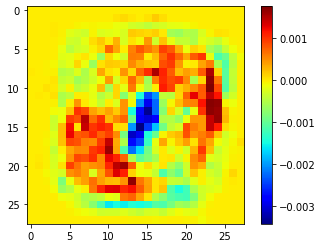

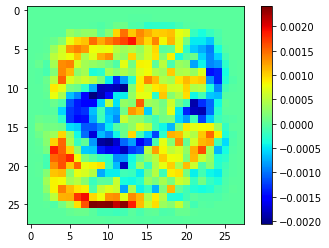

In [7]:
scale = 0.4
#plt.imshow(clf.coef_[0].reshape((28, 28)),
#                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
plt.imshow(clf.coef_[0].reshape((28, 28)), cmap="jet")
# plt.imshow(clf.coef_[0].reshape((28, 28)), cmap="jet",vmin=-scale, vmax=scale)
plt.colorbar()
plt.show()
#plt.imshow(clf.coef_[3].reshape((28, 28)),
#                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
plt.imshow(clf.coef_[3].reshape((28, 28)), cmap="jet")
plt.colorbar()
plt.show()

In [8]:
clf.coef_[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.37232278e-07, -5.33147487e-07,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -4.28375992e-06,  4.78837963e-05,
        1.01943295e-04,  2.42020874e-05, -4.18068094e-06,  5.80913833e-05,
        1.70181612e-04,  8.13878750e-05, -1.47387482e-06, -6.43283067e-06,
       -4.09515235e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# Interpretable Features
Features by corner detection. 

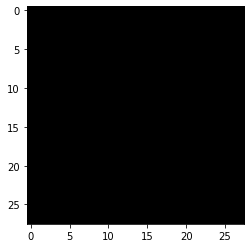

In [31]:
x = np.asarray(x_train[10]).reshape((28,28))
plt.imshow(feature.canny(x), cmap='Greys_r')

In [32]:
feature.corner_peaks(feature.corner_harris(x), 
                     min_distance=5, threshold_rel=0)

array([[13, 11],
       [ 5, 11],
       [20,  7]])

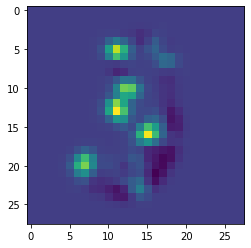

In [33]:
plt.imshow(feature.corner_harris(x))

In [35]:
%%time

# hand-engineering features
# 1] average luminosity
# 2] proportion of canny edge detected image that is filled
# 3] number of corner using corner_peak and corner_harris and some reasonable min (maybe 5)
# 4] max width of pixels

interp_x_train = []
interp_x_valid = []

for x in x_train:
    x = np.asarray(x)
    avg_lumin = np.sum(x)/(28*28)
    edge_prop = np.sum(feature.canny(x.reshape((28, 28))))/(28*28)
    num_corners = len(feature.corner_peaks(feature.corner_harris(x.reshape((28, 28))), 
                     min_distance=5, threshold_rel=0))
    max_width = max(np.sum(x.reshape((28,28)) > 0, axis=1))
    max_height = max(np.sum(x.reshape((28,28)) > 0, axis=0))
    
    interp_x_train.append([
        avg_lumin,
        edge_prop,
        num_corners,
        max_width,
        max_height
    ])
    
interp_x_train = np.array(interp_x_train)

CPU times: user 1min 14s, sys: 122 ms, total: 1min 15s
Wall time: 1min 15s


In [ ]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth = 3, criterion="gini")
clf.fit(interp_x_train, y_train)
print(clf.score(interp_x_train, y_train))

In [ ]:
dot_data = sklearn.tree.export_graphviz(clf, out_file = None, 
                                feature_names = [
                                    "avg_lumin", "edge_prop", "num_corners", "max_width", "max_height"
                                ],
                                class_names = [str(i) for i in range(0, 10)],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
clf = sklearn.linear_model.LogisticRegression(solver='saga', 
                                              penalty='l1',
                                              C=10,
                                              max_iter=200,
                                              multi_class='multinomial').fit(interp_x_train, y_train)
clf.fit(interp_x_train, y_train)
print(clf.score(interp_x_train, y_train))
for c in clf.coef_:
    print(np.round(c, decimals=2))

# Neural Net Interpretability

In [ ]:
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape

In [ ]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = torch.nn.functional.relu(self.conv1(xb))
        xb = torch.nn.functional.relu(self.conv2(xb))
        xb = torch.nn.functional.relu(self.conv3(xb))
        xb = torch.nn.functional.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

loss_func = torch.nn.functional.cross_entropy
lr = 0.1
epochs = 10
bs = 64
train_data = TensorDataset(x_train, y_train)
valid_data = TensorDataset(x_valid, y_valid)

def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

def get_model():
    model = MNIST_Net()
    opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    return(model, opt)

def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)
    print(accuracy(model.forward(x_valid), y_valid))

In [ ]:
%%time
train_dl, valid_dl = get_data(train_data, valid_data, bs)
model, opt = get_model()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

In [ ]:
model.eval()

In [ ]:
torch.argmax(model.forward(x_valid[0]))

In [ ]:
show_mnist(x_valid[0])

In [ ]:
img = x_valid[0].clone()
img.requires_grad = True

for i in range(3):
    logits = model.forward(img)
    loss = -(logits[0][3]**2).mean()
    loss.backward()
    with torch.no_grad():
        g = img.grad
        g = torch.clamp(g/g.abs().mean(), -1, 1)
        show_mnist(-g)
        img.data = img - 0.05*g
        
show_mnist(img.detach())
print(model.forward(img))
print(torch.argmax(model.forward(img)))